<a href="https://colab.research.google.com/github/sid120/Exploratory-data-analysis-using-supermarket-sales-data/blob/main/22010150_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis using supermarket sales data

# Dataset link

## https://www.kaggle.com/aungpyaeap/supermarket-sales

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Other Libraries

# Visualizing NaN values

import missingno as msno

# Visualization

import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Calendar

import calendar

# Geocode

from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import folium
from folium import plugins
import ipywidgets
from branca.element import Figure


# Plotly Options and Config

pio.templates.default = 'plotly_white'
config = {'displayModeBar': False}
colors_x = ['#E0C95A', '#CBE0CA', '#E0864E', '#CDCCE3', '#E3B8D1']
cmaps = 'Blues'

In [ ]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Location of the branches

In [ ]:
city_data = df.City.unique()
cities = pd.DataFrame(data = city_data)
cities

nom = Nominatim(user_agent='Kaggle')

def geo_cities(cities):
    lat = []
    long = []
    flag = 0
    for city in cities['city_name']:
      location = nom.geocode(city)
      try:
        lat.append(location.latitude)
        long.append(location.longitude)
        print(flag)
      except:
        lat.append('NA')
        long.append('NA')
      flag += 1
    cities['Latitude'] = lat
    cities['Longitude'] = long

#geo_cities(cities)
# The geocoding doesn't seem to work in  kaggle notebook so i'll manually add  the output here.

cities = pd.DataFrame({'city_name': ['Yangon', 'Naypyitaw', 'Mandalay'],
                       'Latitude': [16.79671316,19.690708,21.981275],
                       'Longitude' : [96.160992, 96.165883, 96.082375]})

supermarket_geo = folium.Map(location = [19.680708,	96.265883], zoom_start = 7, tiles = 'CartoDB Positron', control_scale = True)

fig = Figure(width = 800, height = 600)
fig.add_child(supermarket_geo)

for (index, row) in cities.iterrows():
  folium.Marker(location = [row.loc['Latitude'], row.loc['Longitude']], popup = row.loc['city_name'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(supermarket_geo)

supermarket_geo

# Variable transformations

### Change the date variable to date

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['weekday'] = df['Date'].dt.day_name()

### Set the Date as the index of the dataset

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
Date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


# Univariate analysis

## Q1: What does the customer rating look like and is it skewed?

<ipython-input-149-68e884508904>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


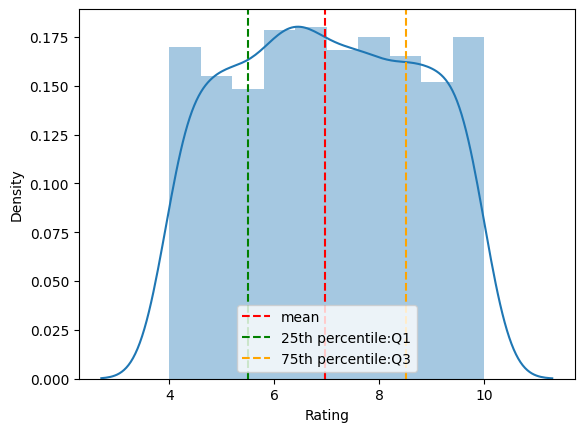

In [ ]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

#### The rating distribution looks uniform and there seems to be no skewness on the left or right side of the distribution. We can plot the mean and the percentiles to show this as well. The red dotted lime is the mean and the green and orange lines indicate the 25th and 75th quartiles respectively.The mean rating is ~7 across products.

## Q2: Is there any difference in aggregate sales across branches?

<Axes: xlabel='Branch', ylabel='count'>

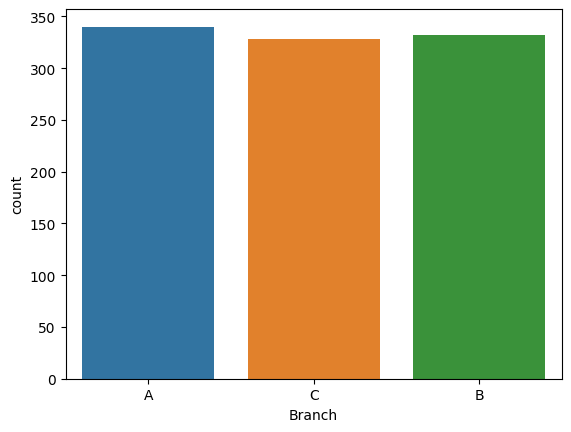

In [ ]:
sns.countplot(data=df, x='Branch')

In [ ]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

#### There is not much difference in sales across the 3 branches of A, B and C. The sales in branch A is a bit higher than the rest of the branches.

## Q3: Which is the most pouplar payment method used by customers?

<Axes: xlabel='Payment', ylabel='count'>

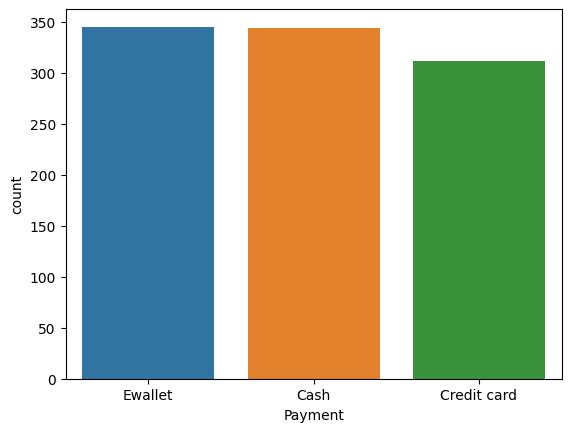

In [ ]:
sns.countplot(data=df, x='Payment')

#### The most popular payment method is in-fact E-wallet and not credit cards.

# Bi-variate analysis

## Q4: Does gross income affect the ratings that the customers provide?

<Axes: xlabel='Rating', ylabel='gross income'>

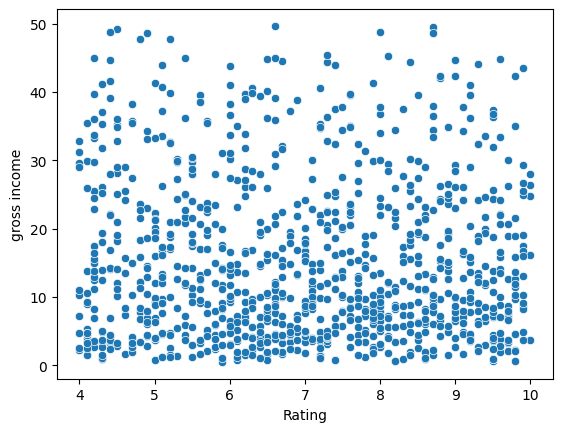

In [ ]:
sns.scatterplot(data=df, x='Rating', y='gross income')

<Axes: xlabel='Rating', ylabel='gross income'>

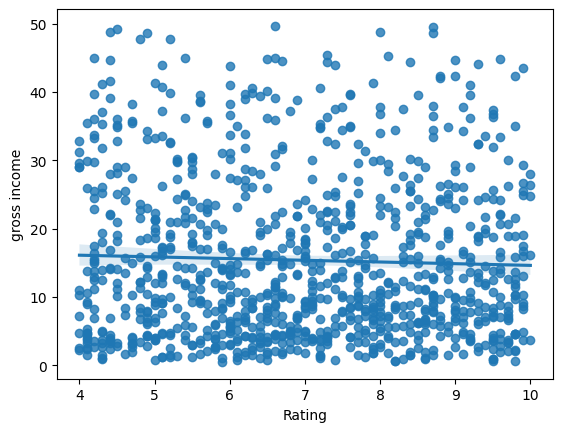

In [ ]:
sns.regplot(data=df, x='Rating', y='gross income')

#### There is no relationship between gross income and customer rating

# Q5: Which branch is the most profitable?

<Axes: xlabel='Branch', ylabel='gross income'>

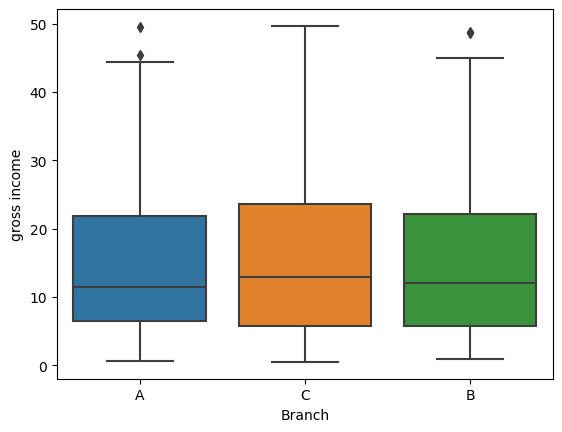

In [ ]:
sns.boxplot(data=df, x='Branch', y='gross income')

#### There is not much difference in gross income by branches at an average level. Branch C has a slightly higher income than A or B, As observed earlier, though branch A has slightly higher sales than the rest C is the most profitable branch in terms of gross income.

# Q6: What is the relationship between Gender and Gross income?

<Axes: xlabel='Gender', ylabel='gross income'>

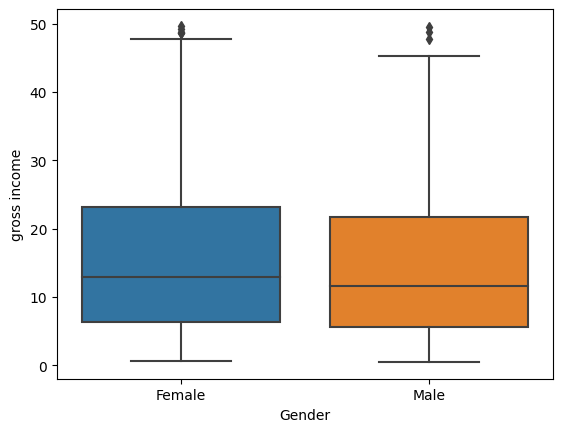

In [ ]:
sns.boxplot(data=df,x='Gender', y='gross income')

#### Gross income is similar for both male and female, though female customers spend a bit higher at the 75th percentile.

## Q7: Is there any time trend in gross income?

In [ ]:
df.groupby(df.index).mean()

<ipython-input-157-68232325ad14>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df.index).mean()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.750000,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


#### There are multiple dates per customers, so we have to summarize the data. We will use date as the index for this and for summarization we will use mean value of the variables. We get 89 rows i.e 89 unique days of data across all customers

<ipython-input-158-b302f86fe6e4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(x= df.groupby(df.index).mean().index,
<ipython-input-158-b302f86fe6e4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = df.groupby(df.index).mean()['gross income'])


<Axes: xlabel='Date', ylabel='gross income'>

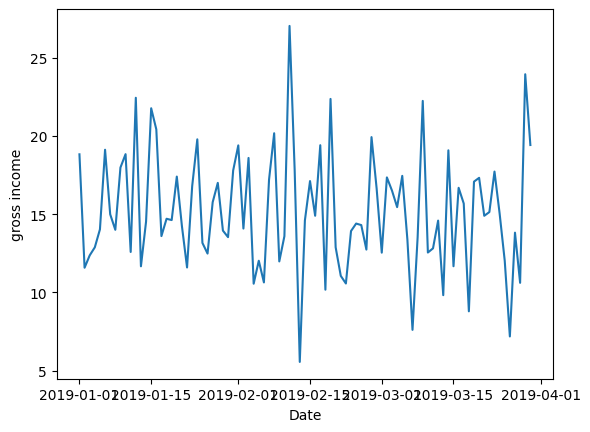

In [ ]:
sns.lineplot(x= df.groupby(df.index).mean().index,
             y = df.groupby(df.index).mean()['gross income'])

#### No particular time trend except for some days the gross income is pretty high and some days it is pretty low. Overall it remains at a certain average level.¶

## Q8: Which product line generates most income?

<Axes: xlabel='Product line', ylabel='gross income'>

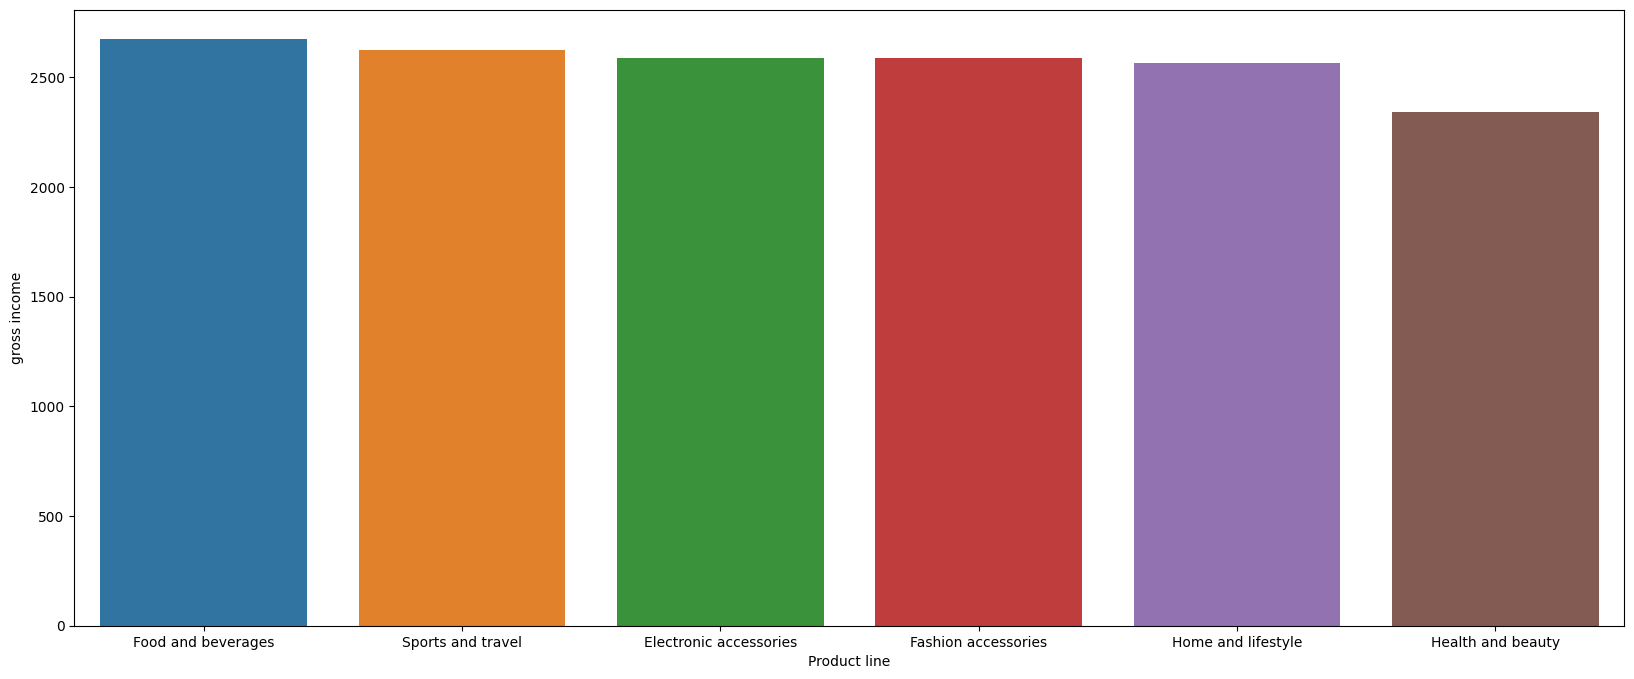

In [ ]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)

#### Gross income is highest in sports and travel.

# Correlation analysis

### Individual correlations

In [ ]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0],2)

-0.04

### Pairwise correlations

In [ ]:
np.round(df.corr(),2)

<ipython-input-161-d296eb131342>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(df.corr(),2)


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


### Visualize correlations

<ipython-input-162-a164aa3e522b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(df.corr(),2), annot=True)


<Axes: >

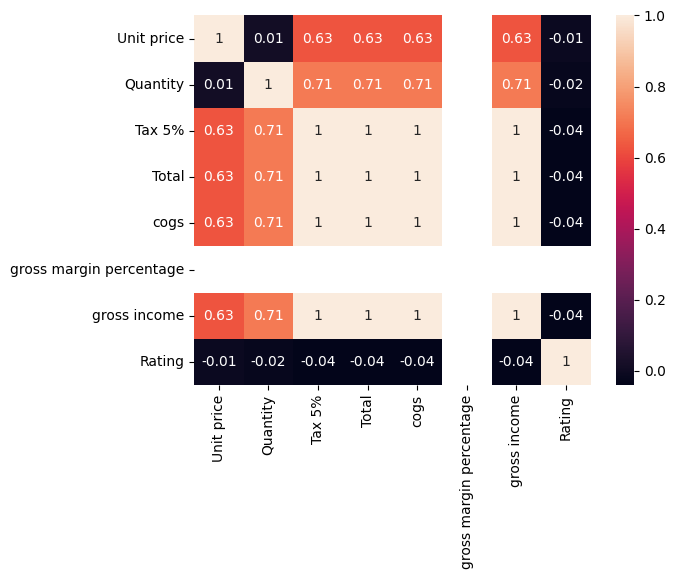

In [ ]:
sns.heatmap(np.round(df.corr(),2), annot=True)

# Other analysis

## Q9:What is the spending patterns of females and males and in which category do they spend a lot?

<Axes: title={'center': 'Total Monthly transaction by Gender'}, xlabel='Product line', ylabel='count'>

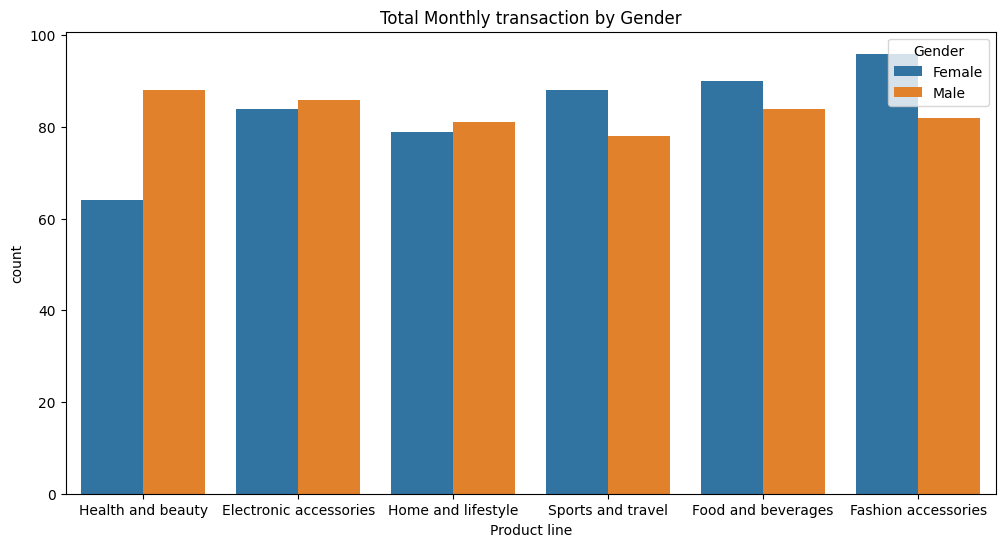

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(data=df ,x='Product line', hue = df.Gender)

#### Females spend on 'fashion accessories' the most and for males surprisingly it is 'Health and beauty'. Females also spend more on 'Sports and travel'.

### Dummy method

In [ ]:
gender_dummies  = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
Date,,
2019-01-05,1,0
2019-03-08,1,0
2019-03-03,0,1
2019-01-27,0,1
2019-02-08,0,1


#### Join the Gender dummies with the original data

In [ ]:
df1 = pd.concat([df, gender_dummies], axis = 1)
df1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,Female,Male
Date,,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,0
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,1,0
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,0,1
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,0,1
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,0,1


#### Spending pattern of Female

<Axes: xlabel='Product line', ylabel='Female'>

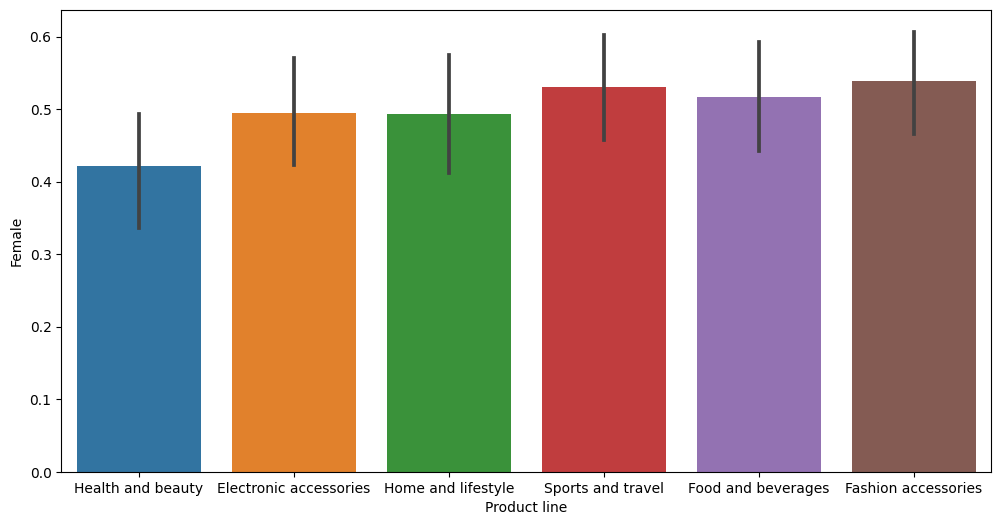

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Female', data = df1)

#### Spending pattern of Male

<Axes: xlabel='Product line', ylabel='Male'>

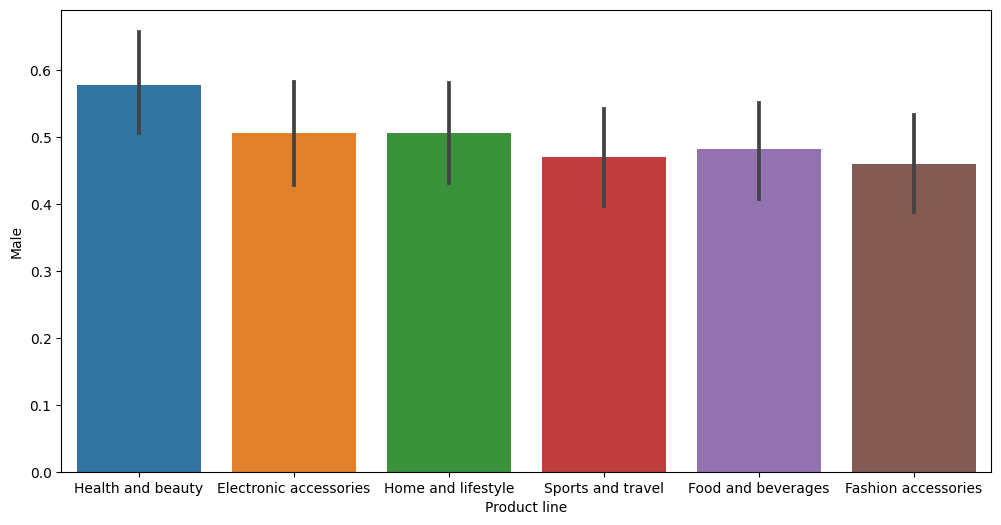

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Male', data = df1)

## Question 10: How many products are bought by customers?

<ipython-input-168-bf74e332f46b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])


([<matplotlib.axis.XTick at 0x7ee187cef520>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

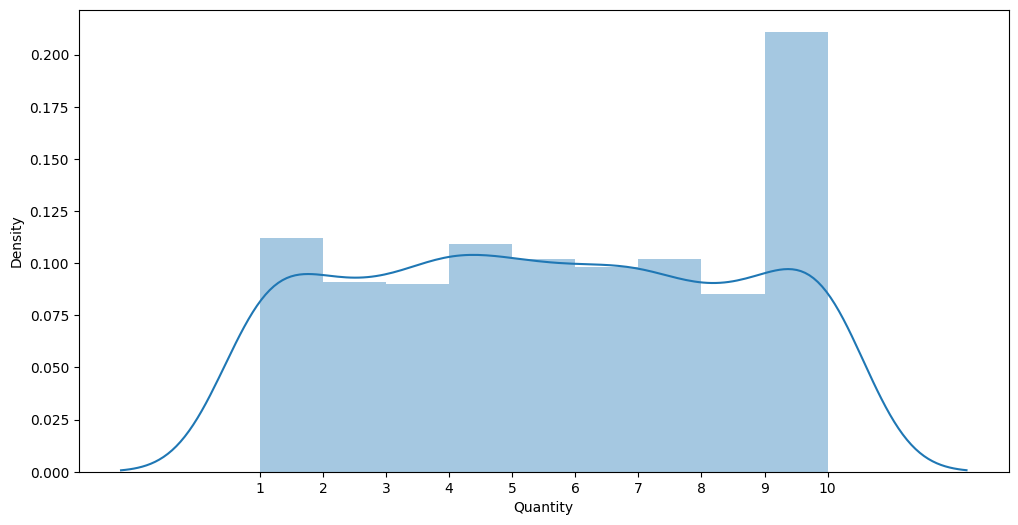

In [ ]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.distplot(df['Quantity'])
plt.xticks(xdata)

#### Most of the customers buy 10 quantities

## Q11: Which day of the week has maximum sales?

<Axes: title={'center': 'Daily Sales by Day of the Week'}, xlabel='weekday', ylabel='count'>

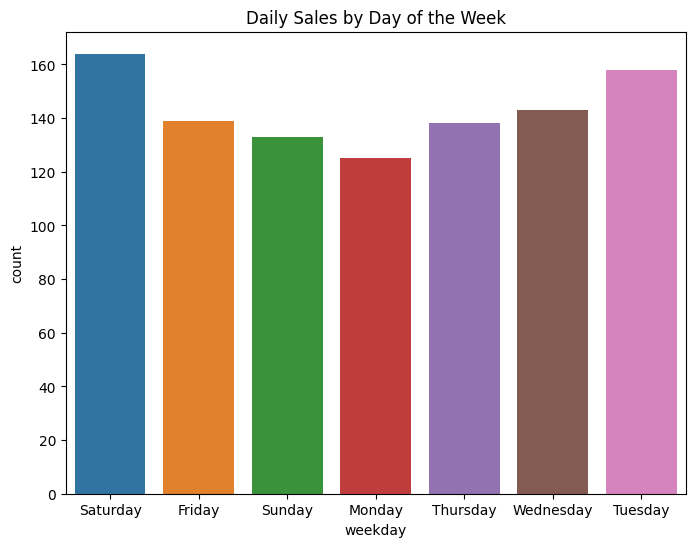

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(data=df ,x='weekday')

#### Sales is highest on Saturdays probably because it is the weekend. Interestingly,Tuesdays is a close second.Mondays is the lowest in sales.

## Q12: Which hour of the day is the busiest?

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

Text(0.5, 1.0, 'Product Sales per Hour')

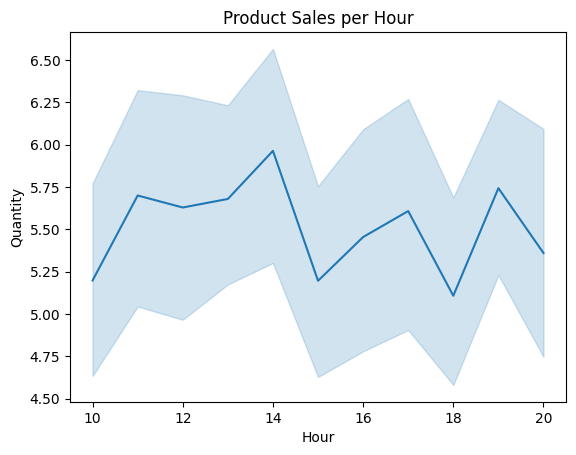

In [ ]:
sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

#### Peak is observed in the 14th hour i.e 2 pm of the day. Hence, sales is typically higher in the afternoons.

## Question 13: Which product line should the supermarket focus on?

### a) Rating of products

([<matplotlib.axis.XTick at 0x7ee187cc06a0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

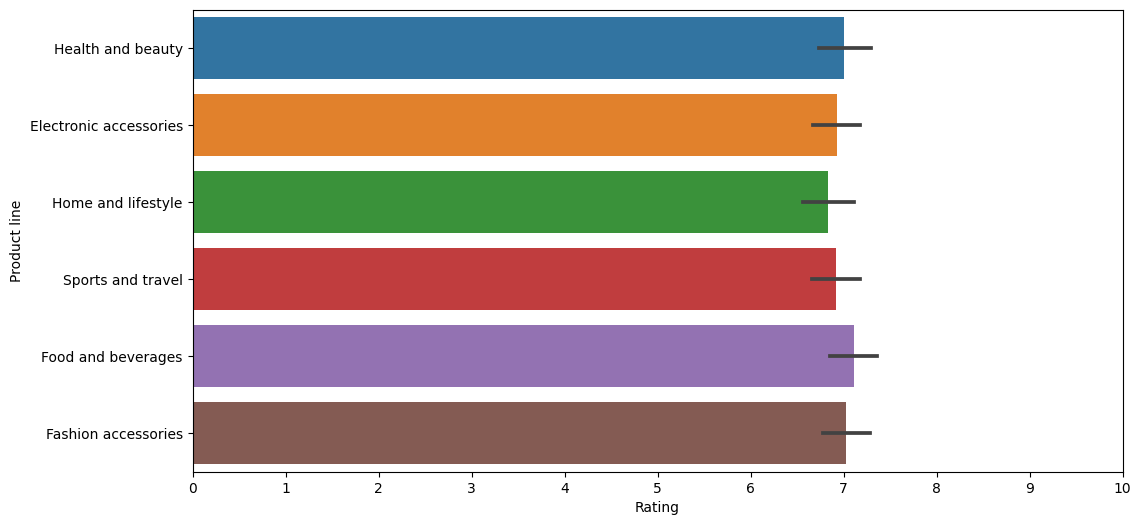

In [ ]:
xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(data=df, y = 'Product line', x = 'Rating')
plt.xticks(xdata)

### b) Quantity purchased by product

<Axes: xlabel='Quantity', ylabel='Product line'>

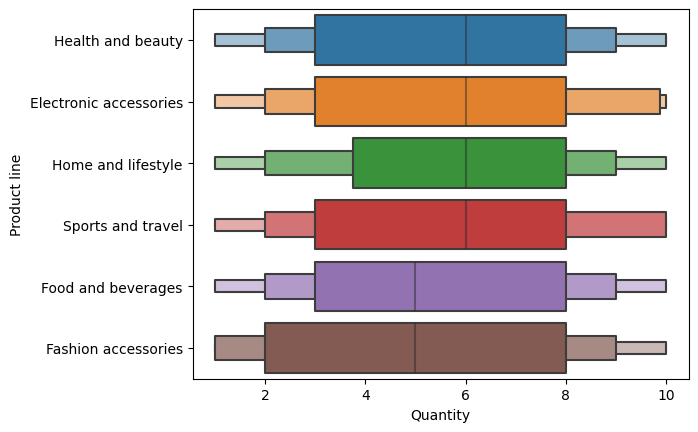

In [ ]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df )

#### Though the rating for 'fashion accessories' and 'food and beverages' is high but quantity purchased is low. Hence, supply for these products need to be increased.

## Q14: Which city should be chosen for expansion and which products should it focus on?

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0')])

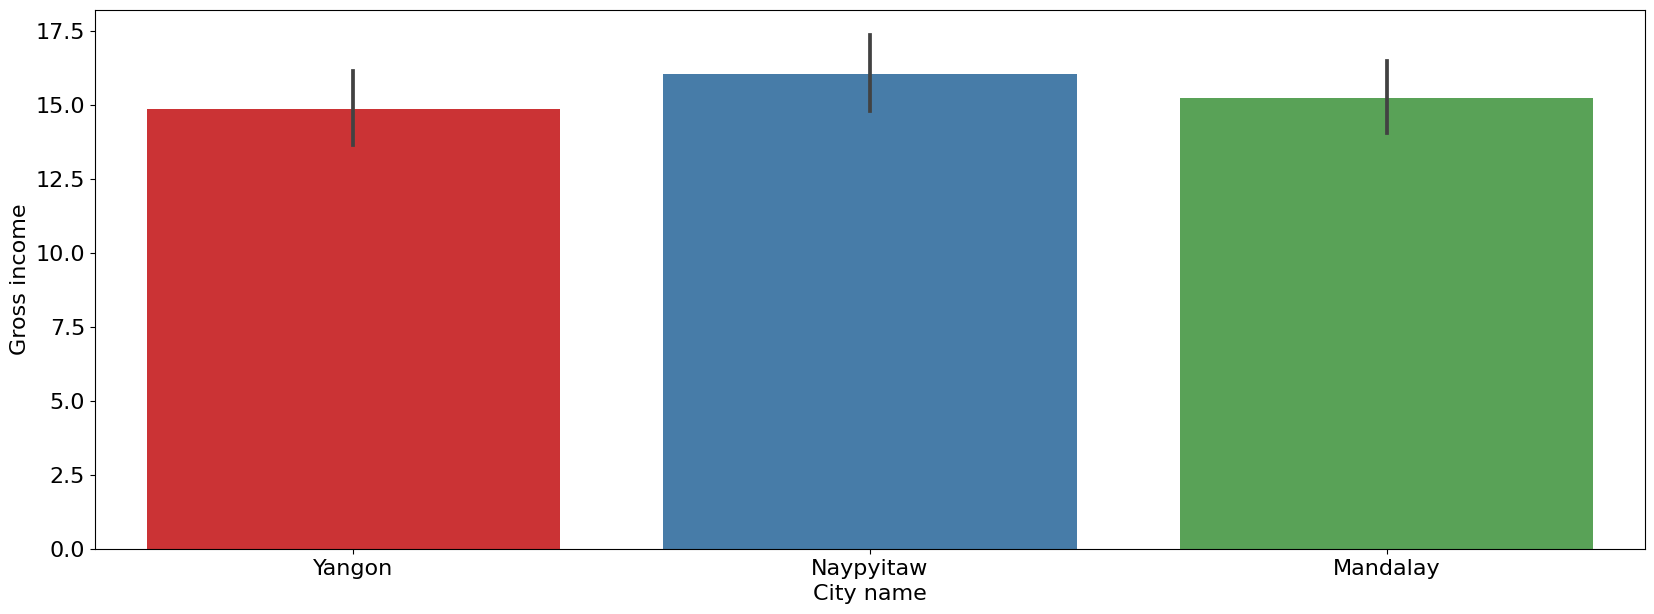

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(data=df, x='City',y='gross income',palette='Set1')
plt.xlabel('City name',fontsize='16')
plt.xticks(fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.yticks(fontsize='16')

#### It is obvious that Naypyitaw is the most profitable city, hence the expansion plan should be based on this city.

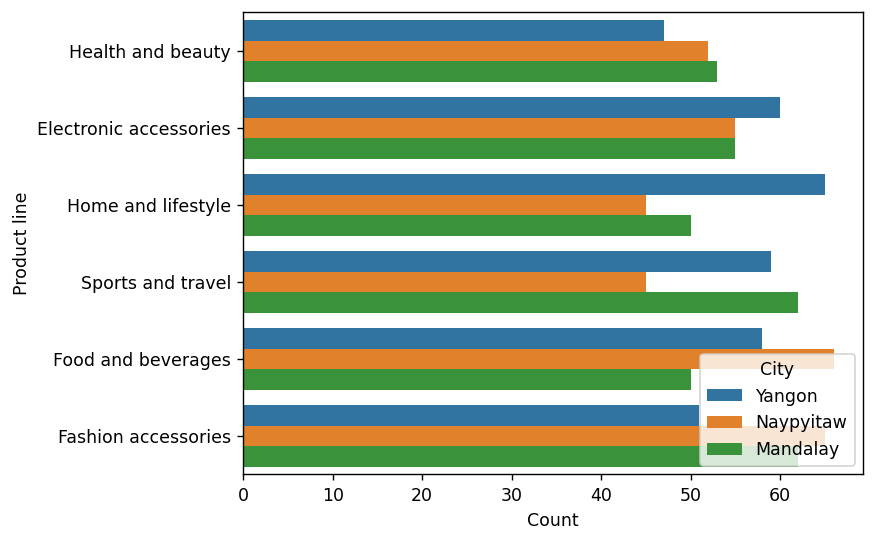

In [ ]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = df)
plt.xlabel('Count')
plt.show()

#### Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on for expansion along with electronic accessories.